# Extra report plots

## Three data sets, L = 10, 20, 40

In [503]:
import numpy as np
import matplotlib.pyplot as plt

data_dir = './exported_data/'

fig_dir = './exported_figs/'
identifier = 'triple_'
fig_name = fig_dir + identifier

data_names = ['c_v', 'magnetisation', 'chi']
L_range = [10, 20, 40]
T_data = 81

y_data = np.zeros((len(L_range), T_data))
x_data = np.zeros((len(L_range), T_data))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)

for data_name in data_names:
    for i, L in enumerate(L_range):
        name = 'saved_data_L' + str(L) +'_SW_2000.npz'
        npzfile = np.load(data_dir + name)
        y_data[i] = npzfile[data_name][:,0]
        x_data[i] = npzfile['temperature'][:,0]

    markers = ['+', 'x', '.']
    for k, x in enumerate(x_data):
        plt.plot(x, y_data[k], markers[k], markersize = 6)
        plt.xlabel('$\mathrm{k_B T/J}$', fontsize=18)
    plt.legend(['L = 10', 'L = 20', 'L = 40'])

    
    if data_name == 'c_v':
        plt.ylabel('$\mathrm{C_v}$', fontsize=18)
    if data_name == 'magnetisation':
        plt.ylabel('$ m^{2} $', fontsize=18)   
    if data_name == 'chi':
        plt.ylabel('$\chi$', fontsize=18)
    
    plt.tight_layout()
    plt.savefig(fig_name + data_name + '.png')
    plt.close()

In [685]:
import numpy as np
import matplotlib.pyplot as plt

data_dir = './exported_data/'

data_names = ['chi']
L_range = [10, 15, 20, 25, 30, 35, 40]
T_data = 81

y_data = np.zeros((len(L_range), T_data))
y_err = np.zeros((len(L_range), T_data))
x_data = np.zeros((len(L_range), T_data))
x_err = np.zeros((len(L_range), T_data))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)

top_xy = np.zeros((len(L_range), 2))
top_xy_err = np.zeros((len(L_range), 2))

for data_name in data_names:
    for i, L_i in enumerate(L_range):
        name = 'saved_data_L' + str(L_i) +'_SW_2000.npz'
        npzfile = np.load(data_dir + name)
        y_data[i] = npzfile[data_name][:,0]
        y_err[i] = npzfile[data_name][:,1]
        
        j = np.argmax(y_data[i])
        top_xy [i, 1]= y_data[i, j]
        top_xy_err[i,1] = y_err[i,j]
        
        x_data[i] = npzfile['temperature'][:,0]
        top_xy[i, 0] = x_data[i,j]
        
        top_xy_err[i,0] = abs(npzfile['temperature'][j + 1,0] - npzfile['temperature'][j,0])/2

In [662]:
def f(L, x, c):
    return L**(x) + c

def fit_funct(f, L, Y, err, bounds):
    popt, pcov = curve_fit(f, L, Y, sigma = err, bounds = bounds)
    fit_err = np.sqrt(np.diag(pcov))
    return popt, fit_err

In [686]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

popt, fit_err = fit_funct(f, L_range, top_xy[:,0], top_xy_err[:,0], (-np.inf, np.inf))
popt2, fit_err2 = fit_funct(f, L_range, top_xy[:,1], top_xy_err[:,1], (-np.inf, np.inf))

(array([-0.18577899,  1.80973906]), array([ 0.03925131,  0.068171  ]))

z = 0.19 ( 4 )


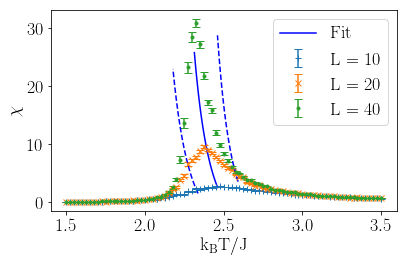

In [722]:
fig_dir = './exported_figs/'
identifier = 'triple_fit_'
fig_name = fig_dir + identifier
markers = ['+', 'x', '.']

ii = 0
for k, L_i in enumerate(L_range):
    if L_i in [10, 20, 40]:
        plt.errorbar(x_data[k], y_data[k], yerr=y_err[k], fmt=markers[ii%3], label = 'L = %.f'%L_i , markersize = 6, capsize = 4)
        ii += 1

plt.xlabel('$\mathrm{k_B T/J}$', fontsize=18)
plt.ylabel('$\chi$', fontsize=18)

L_size = np.linspace(10, 40, 100)
x = f(L_size, *popt)
x_max = f(L_size, *popt + fit_err)
x_min = f(L_size, *popt - fit_err) 

y = f(L_size, *popt2)
y_max = f(L_size, *popt2 + fit_err2)
y_min = f(L_size, *popt2 - fit_err2)

plt.plot(x, y, 'b-', label = 'Fit')
plt.legend()
plt.plot(x_max, y_max, 'b--')
plt.plot(x_min, y_min, 'b--')
plt.tight_layout()
print('z =', np.round(-popt[0], 2), '(', int(np.round(100*fit_err[0],0)), ')' )
plt.show()
#plt.savefig(fig_name + data_name + '.png')
#plt.close()